# Cookbook

Here we provide a set of recipes detailing the functionality available in our set of packages

### 0) Including the libraries

In [1]:
from catalog_specs import cat_specs #to set the catalog specifications
from cosmo import cosmo #to set the cosmology
from code_options import code_parameters #to set the cosmological parameters
from converting_cats_in_cats_of_bins import * #To convert any halo catalog according to bins of mass
from colossus.cosmology import cosmology #To compute bias
from colossus.lss import bias #To compute bias
from create_grids_from_xyz_cats_beta import * #to build the cats
from MTPK_estimate_beta import * #to estimate the spectra
import numpy as np
import matplotlib.pyplot as plt

### 1) Instantiating the parameters

The fiducial **specifications** about the **catalogs** are given by:

In [2]:
cat_specs = cat_specs()
cat_specs.parameters_print()

nhalos = 3
n_maps = 4
col_m = 6
col_x = 0
col_y = 1
col_z = 2
x_cat_min = 0.0
y_cat_min = 0.0
z_cat_min = 0.0
x_cat_max = 128.0
y_cat_max = 128.0
z_cat_max = 128.0
m_min = 316227766016.83795
m_max = 10000000000000.0
V = 2097152.0


The **fiducial cosmology** is given by (defined according to [Planck 2018](https://arxiv.org/abs/1807.06209)):

In [3]:
my_cosmology = cosmo()
my_cosmology.parameters_print()

h = 0.678
Omega0_b = 0.048206
Omega0_cdm = 0.2589
Omega0_m = 0.307106
Omega0_k = 0.0
Omega0_DE = 0.692894
A_s = 2.1867466842075255e-09
ln10e10AsA = 3.085
n_s = 0.96
w0 = -1.0
w1 = 0.0
z_re = 9.99999
flat = True
gamma = 0.5454
matgrowcentral = 1e-05
zcentral = 1.0
c_light = 299792.458


### You can change the parameters giving:

Simple change:

In [4]:
my_cosmology = cosmo(h = 0.678, n_s = 0.96)
my_cosmology.parameters_print()

h = 0.678
Omega0_b = 0.048206
Omega0_cdm = 0.2589
Omega0_m = 0.307106
Omega0_k = 0.0
Omega0_DE = 0.692894
A_s = 2.1867466842075255e-09
ln10e10AsA = 3.085
n_s = 0.96
w0 = -1.0
w1 = 0.0
z_re = 9.99999
flat = True
gamma = 0.5454
matgrowcentral = 1e-05
zcentral = 1.0
c_light = 299792.458


Using the `methods` of the class:

In [5]:
mg_evol = cosmo().f_evolving(0)
mg_phe = cosmo().f_phenomenological()
mg_evol, mg_phe

(0.5252511834620611, 0.5252511834620611)

In [6]:
my_cosmology = cosmo(matgrowcentral = mg_evol)
my_cosmology.parameters_print()

h = 0.678
Omega0_b = 0.048206
Omega0_cdm = 0.2589
Omega0_m = 0.307106
Omega0_k = 0.0
Omega0_DE = 0.692894
A_s = 2.1867466842075255e-09
ln10e10AsA = 3.085
n_s = 0.96
w0 = -1.0
w1 = 0.0
z_re = 9.99999
flat = True
gamma = 0.5454
matgrowcentral = 0.5252511834620611
zcentral = 1.0
c_light = 299792.458


### 2) Spliting the catalogs in bins

One of the main characteristics of the `MTPK` package is to compute the power spectra for different tracers. Here we present a library to split them according to halo mass. The parameters can be given according to:

In [7]:
#This method print the parameters from this class
converting_cats_in_cats_of_bins().params_print()

cats = ['data/ExSHalos/L128_000_halos.dat', 'data/ExSHalos/L128_001_halos.dat', 'data/ExSHalos/L128_002_halos.dat', 'data/ExSHalos/L128_003_halos.dat']
skiprows = 1
path_to_save = data/ExSHalos/


Then, you can instantiate the params according to your choices. For example:

In [8]:
sp_bins = converting_cats_in_cats_of_bins()
sp_bins

In [9]:
MF = sp_bins.to_bins(cat_specs)
MF

Catalogs created!


array([0.01251531, 0.00373197, 0.0007205 ])

The central masses per bin are given using the `method`:

In [10]:
m_ctrs = sp_bins.central_masses(cat_specs)
m_ctrs

[658113883008.419, 2081138830084.1897, 6581138830084.189]

To compute an estimative for the bias of each halo bin we can use the `Colossus` library:

In [11]:
cosmology.setCosmology('planck18')
b = []
for i in range( len(m_ctrs) ):
    b.append( bias.haloBias(m_ctrs[i], model = 'tinker10', z = 1, mdef = 'vir') )
b

[1.2086210355250606, 1.5027890453729722, 1.9830274528457887]

### 3) Setting `MTPK code` different options

Setting different (if compared to fiducial ones) code options according to the computed _mass function_ and _bias_

In [12]:
#Defining the code options
my_code_options = code_parameters(method = 'both', multipoles_order = 4,
                                  do_cross_spectra = True, 
                                  nhalos = 3,
                                  mass_fun = MF,
                                  halo_bias = np.array(b))

### 4) Creating the catalogs

You can create the cats using `create_grids_from_xyz_cats_beta`

In [13]:
#User definitions about where to do each thing
input_filename = 'ExSHalos'
filenames_catalogs = 'data/ExSHalos/seed*.dat'
dir_out = "maps/sims/ExSHalos/"

In [14]:
create_grids_from_xyz_cats(cat_specs, my_cosmology, my_code_options, 
                           input_filename, filenames_catalogs, dir_out)


Will load maps stored in files:
[['data/ExSHalos/seed0_bin0.dat' 'data/ExSHalos/seed0_bin1.dat'
  'data/ExSHalos/seed0_bin2.dat']
 ['data/ExSHalos/seed1_bin0.dat' 'data/ExSHalos/seed1_bin1.dat'
  'data/ExSHalos/seed1_bin2.dat']
 ['data/ExSHalos/seed2_bin0.dat' 'data/ExSHalos/seed2_bin1.dat'
  'data/ExSHalos/seed2_bin2.dat']
 ['data/ExSHalos/seed3_bin0.dat' 'data/ExSHalos/seed3_bin1.dat'
  'data/ExSHalos/seed3_bin2.dat']]
Dimensions of the grids: n_x, n_y, n_z = 128 128 128

The actual catalog spans the ranges in x,y,z:
x: 0.0 --> 128.0
y: 0.0 --> 128.0
z: 0.0 --> 128.0


With the padding length, of  0 cells, the box will be filled with:
x: ( 0 * 0 , 128 , 0 *0)
y: ( 0 * 0 , 128 , 0 *0)
z: ( 0 * 0 , 128 , 0 *0)

Check: given the padding, your catalog should end at cartesian positions:
max(x) = 128.0
max(y) = 128.0
max(z) = 128.0

Origin (0,0,0) of box will be considered to be displaced from the observer @Earth
by these numbers of cells in each direction:    (This affects RSDs!)
n_x_ori

### 5) Estimating the spectra

You can estimate the spectra using the function inside `MTPK_estimate_beta` code. The `handle_data` is the same as the `input_file_name`

In [15]:
#Some user options
handle_data = "ExSHalos"
dir_maps = 'maps/sims/ExSHalos/'
dir_data = 'maps/data/ExSHalos/'
dir_specs = 'spectra/ExSHalos/'

In [16]:
MTPK_estimate(cat_specs, my_cosmology, my_code_options, dir_maps, dir_data, dir_specs, handle_data = handle_data)



This is the Multi-tracer power spectrum estimator

Handle of this run (fiducial spectra, biases, etc.):  ExSHalos

Beggining CAMB calculations

Computing matter power spectrum for given cosmology...

.
Generating the k-space Grid...
.
Will use the N = 4  simulation-only maps contained in directory maps/sims/ExSHalos/
.
Geometry: (nx,ny,nz) = (128,128,128),  cell_size=1.0 h^-1 Mpc
Geometry including bounding box: (nx,ny,nz) = (128,128,128)
.
Using power spectrum from CAMB + HaloFit
.
----------------------------------
.
Will estimate modes up to k[h/Mpc] =  1.0000  in bins with Delta_k = 0.0234
.
----------------------------------
.

----------------------------------

Central physical k values where spectra will be estimated: 0.1
Initializing the k-binning matrix...
Done with k-binning matrices. Time cost:  0.353 s
Memory occupied by the binning matrix:  16727
Originally k_bar was defined as: ['0.0441', '0.0516', '0.0590']
The true mean of k for each bin is: ['0.0444', '0.0513', '0.0

### 6) Some plots

In [17]:
# Taking data
P0_FKP = np.loadtxt('spectra/ExSHalos/ExSHalos_P0_FKP.dat')
P0_MT = np.loadtxt('spectra/ExSHalos/ExSHalos_P0_MTOE.dat')

P2_FKP = np.loadtxt('spectra/ExSHalos/ExSHalos_P2_FKP.dat')
P2_MT = np.loadtxt('spectra/ExSHalos/ExSHalos_P2_MTOE.dat')

P4_FKP = np.loadtxt('spectra/ExSHalos/ExSHalos_P4_FKP.dat')
P4_MT = np.loadtxt('spectra/ExSHalos/ExSHalos_P4_MTOE.dat')

C0_FKP = np.loadtxt('spectra/ExSHalos/ExSHalos_C0_FKP.dat')
C2_FKP = np.loadtxt('spectra/ExSHalos/ExSHalos_C2_FKP.dat')
C4_FKP = np.loadtxt('spectra/ExSHalos/ExSHalos_C4_FKP.dat')

k = np.loadtxt('spectra/ExSHalos/ExSHalos_vec_k.dat')

In [19]:
n_bins = cat_specs.nhalos
n_cats = cat_specs.n_maps
n_k = k.shape[0]

P0_FKP = P0_FKP.reshape(n_bins, n_cats, n_k)
P0_MT = P0_MT.reshape(n_bins, n_cats, n_k)

P2_FKP = P2_FKP.reshape(n_bins, n_cats, n_k)
P2_MT = P2_MT.reshape(n_bins, n_cats, n_k)

P4_FKP = P4_FKP.reshape(n_bins, n_cats, n_k)
P4_MT = P4_MT.reshape(n_bins, n_cats, n_k)

C0_FKP = C0_FKP.reshape(n_bins, n_cats, n_k)
C2_FKP = C2_FKP.reshape(n_bins, n_cats, n_k)
C4_FKP = C4_FKP.reshape(n_bins, n_cats, n_k)

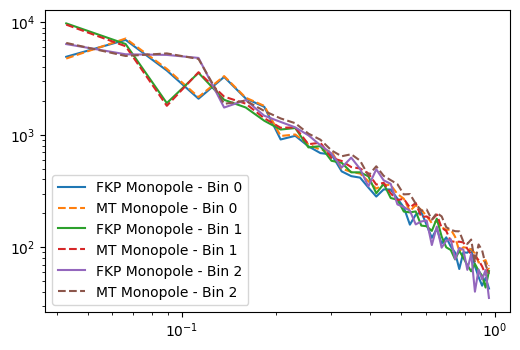

In [20]:
plt.figure(dpi = 100)
for i in range(n_bins):
    plt.loglog(k, np.mean(P0_FKP, axis = 1)[i], label = f'FKP Monopole - Bin {i}')

    plt.loglog(k, np.mean(P0_MT, axis = 1)[i], '--', label = f'MT Monopole - Bin {i}')
    plt.legend()

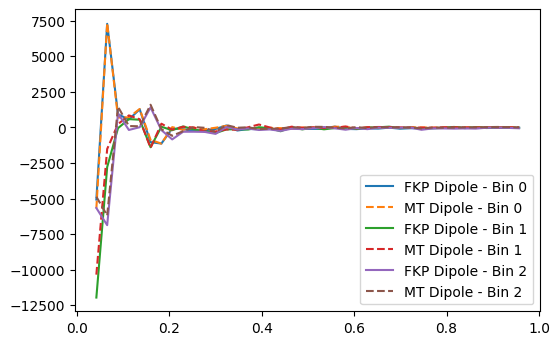

In [21]:
plt.figure(dpi = 100)
for i in range(n_bins):
    plt.plot(k, np.mean(P2_FKP, axis = 1)[i], label = f'FKP Dipole - Bin {i}')

    plt.plot(k, np.mean(P2_MT, axis = 1)[i], '--', label = f'MT Dipole - Bin {i}')
    plt.legend()

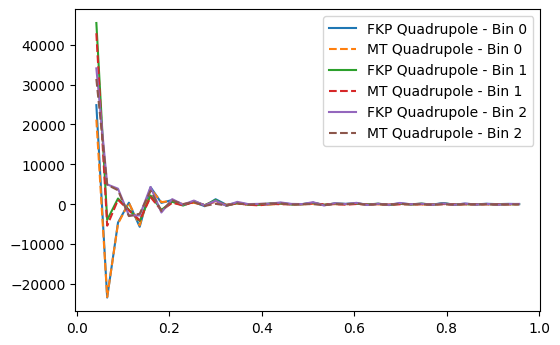

In [22]:
plt.figure(dpi = 100)
for i in range(n_bins):
    plt.plot(k, np.mean(P4_FKP, axis = 1)[i], label = f'FKP Quadrupole - Bin {i}')

    plt.plot(k, np.mean(P4_MT, axis = 1)[i], '--', label = f'MT Quadrupole - Bin {i}')
    plt.legend()

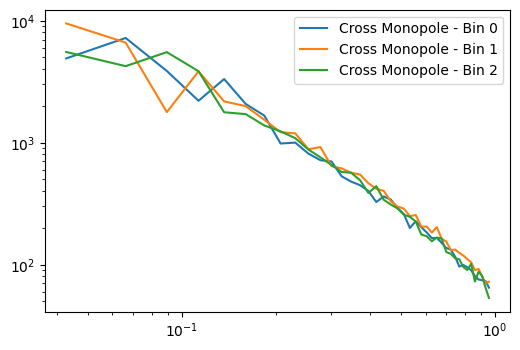

In [23]:
plt.figure(dpi = 100)
for i in range(n_bins):
    plt.loglog(k, np.mean(C0_FKP, axis = 1)[i], label = f'Cross Monopole - Bin {i}')
    plt.legend()

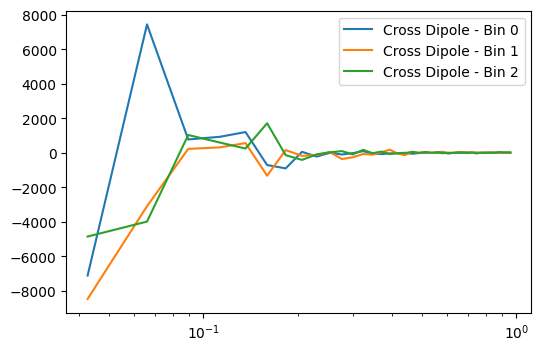

In [24]:
plt.figure(dpi = 100)
for i in range(n_bins):
    plt.plot(k, np.mean(C2_FKP, axis = 1)[i], label = f'Cross Dipole - Bin {i}')
    plt.xscale('log')
    plt.legend()